In [114]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import matplotlib.gridspec as gridspec #Used for organizing figures
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.stats import vonmises
import os as os
from glob import glob
%matplotlib inline

In [170]:
file_names = glob('VM_analysis_0450_*')
print(file_names[4])

VM_analysis_0450_du1.txt


In [138]:
pred_rakes = []
rake_dist = []
dip_uncert = []

for f in file_names:

    VM_data = np.array(pd.read_csv(f,  header=None))
    pred_rakes.append(VM_data[:, 0])
    rake_dist.append(VM_data[:, 1])
    dip_uncert.append(VM_data[:, 2])
    
    

In [126]:
print(len(pred_rakes))

6


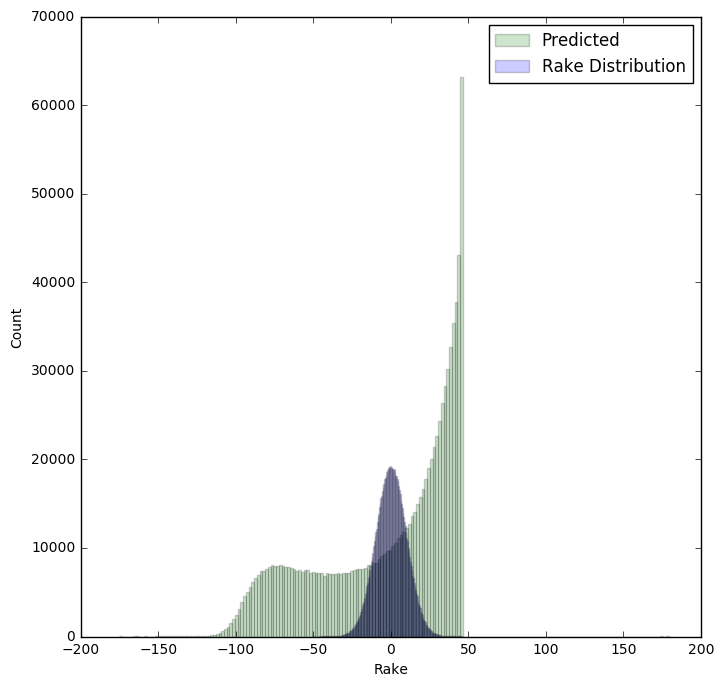

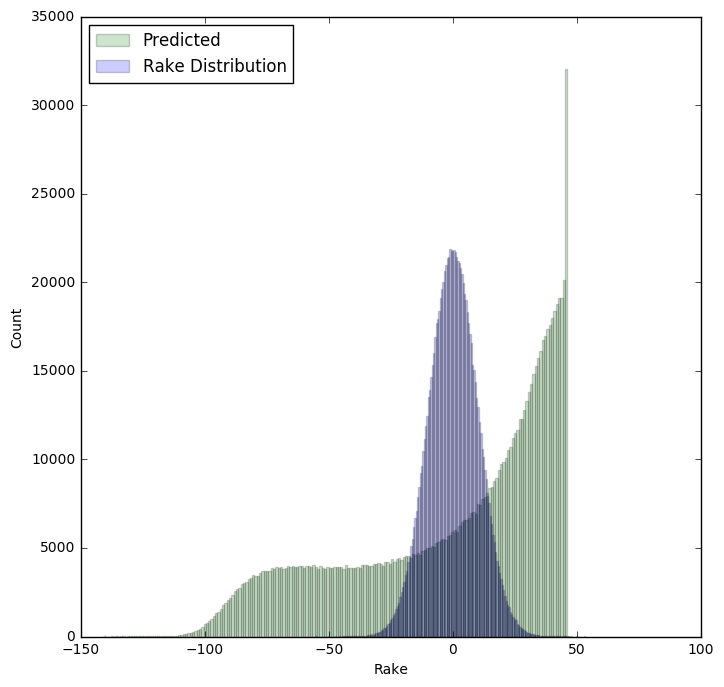

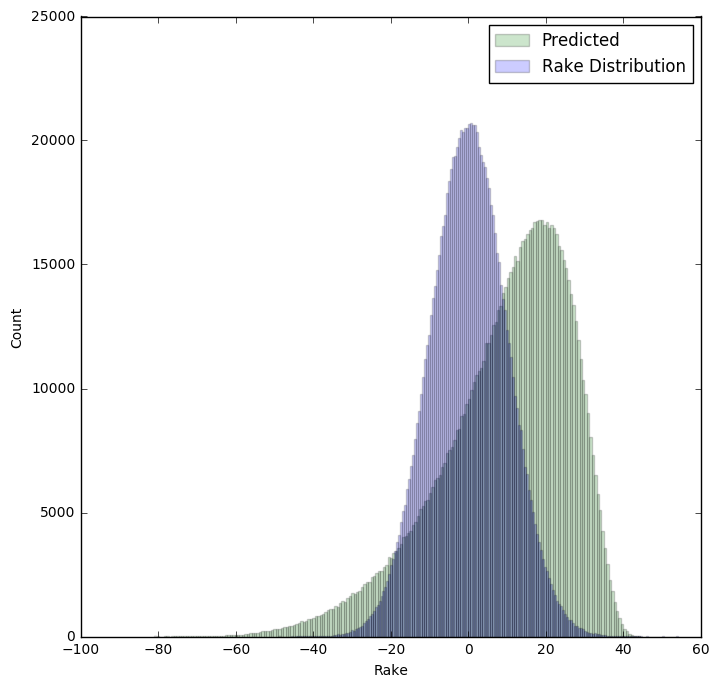

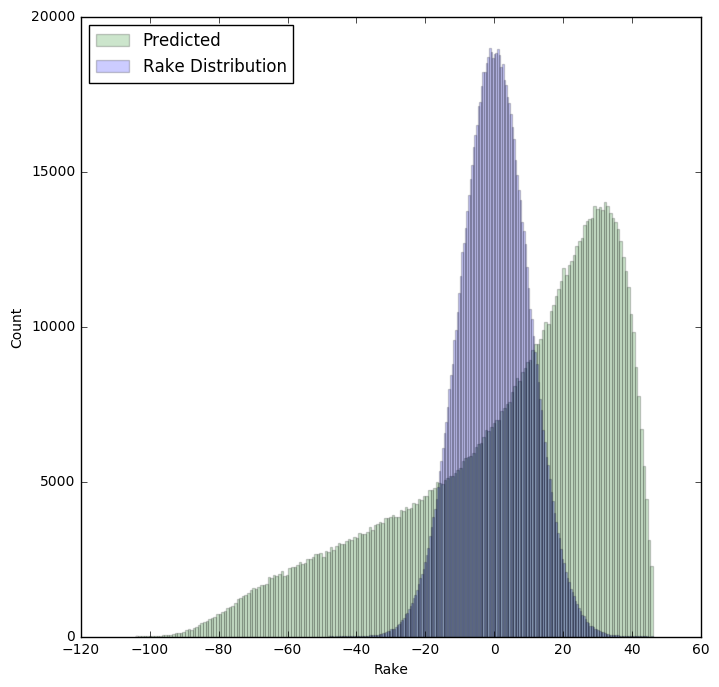

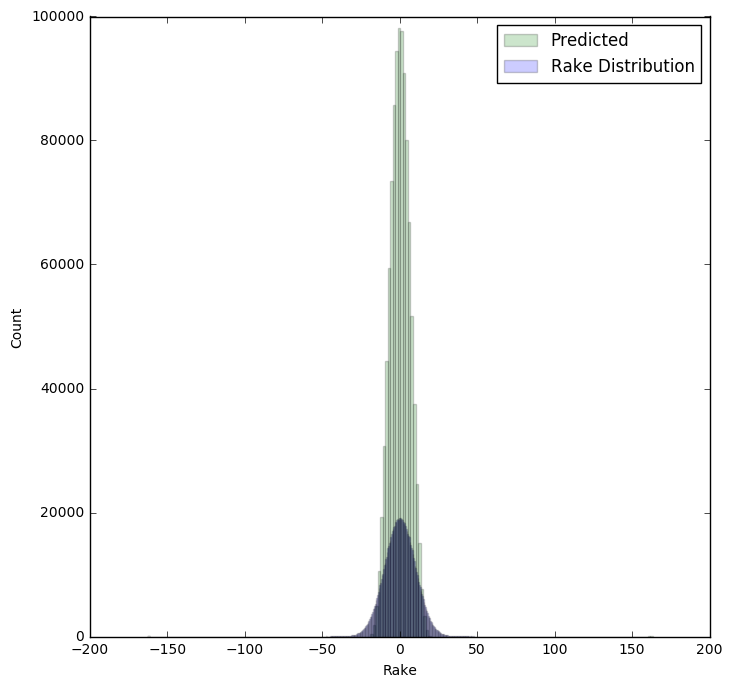

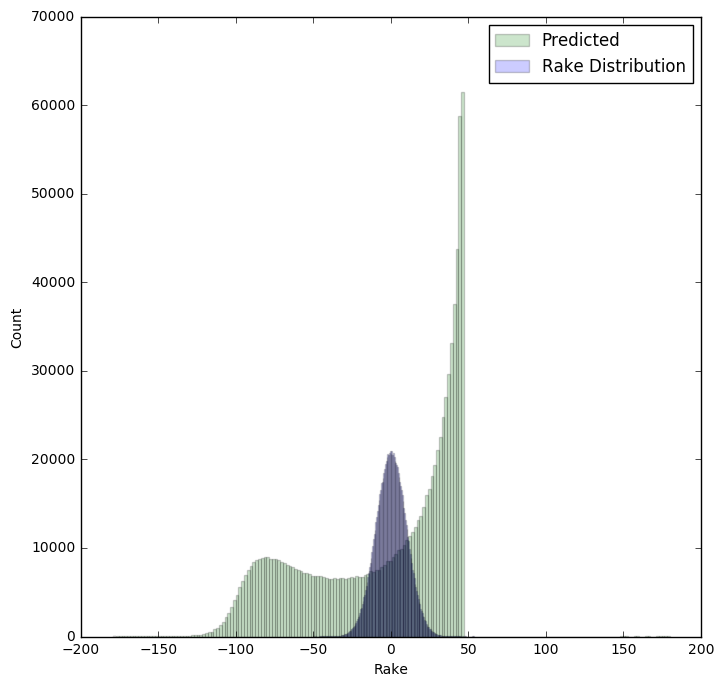

In [139]:
for i in range(len(pred_rakes)):
    
    fig = plt.figure(figsize=(8, 8))
    gs = gridspec.GridSpec(1, 1)

    ax = plt.subplot(gs[0, 0]) # row 0, col 0
    ax.hist(pred_rakes[i]*180/np.pi, bins = 200, color = 'green', alpha = 0.2, label = "Predicted")
    ax.hist(rake_dist[i]*180/np.pi, bins = 200, color = 'blue', alpha = 0.2, label = "Rake Distribution")
    ax.set_xlabel('Rake')
    ax.set_ylabel('Count')
    ax.legend(loc = 0)
    
    plt.savefig('Rake_Dist_0450_{}.pdf' .format(i))

   



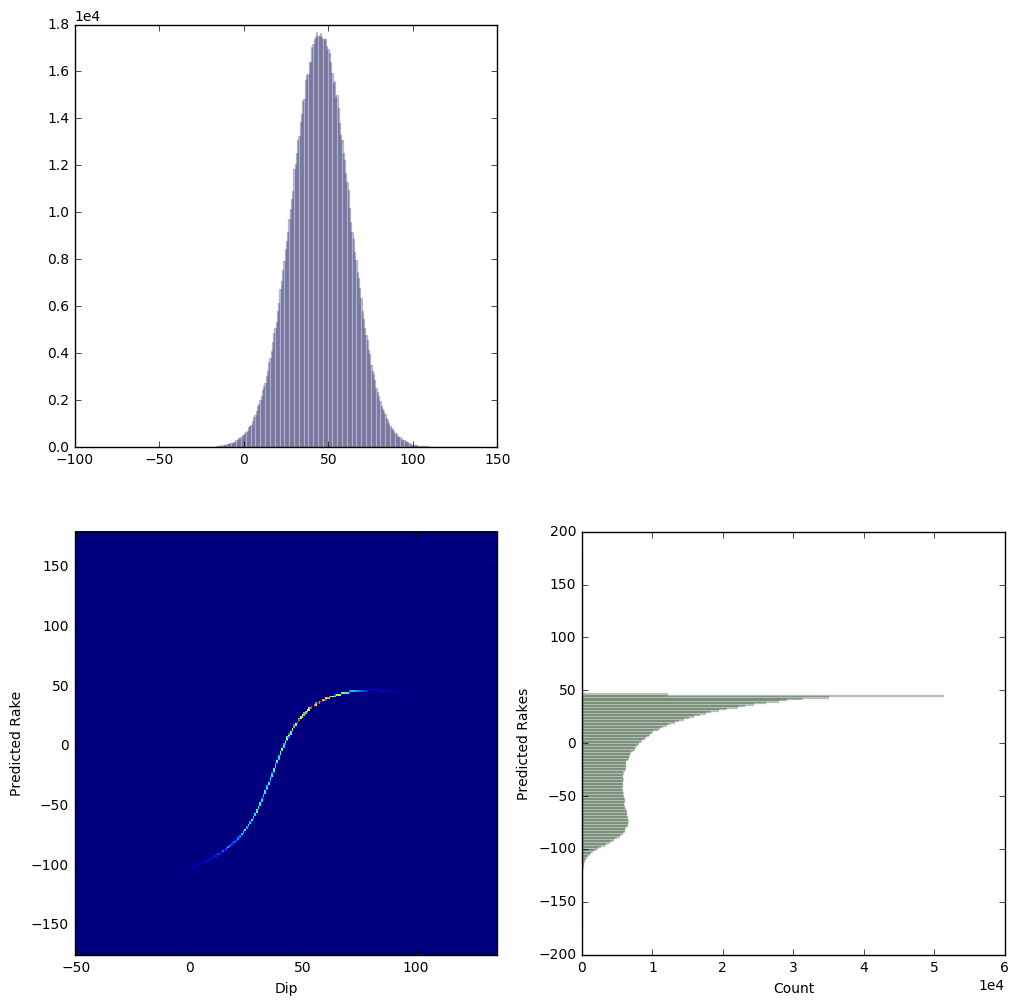

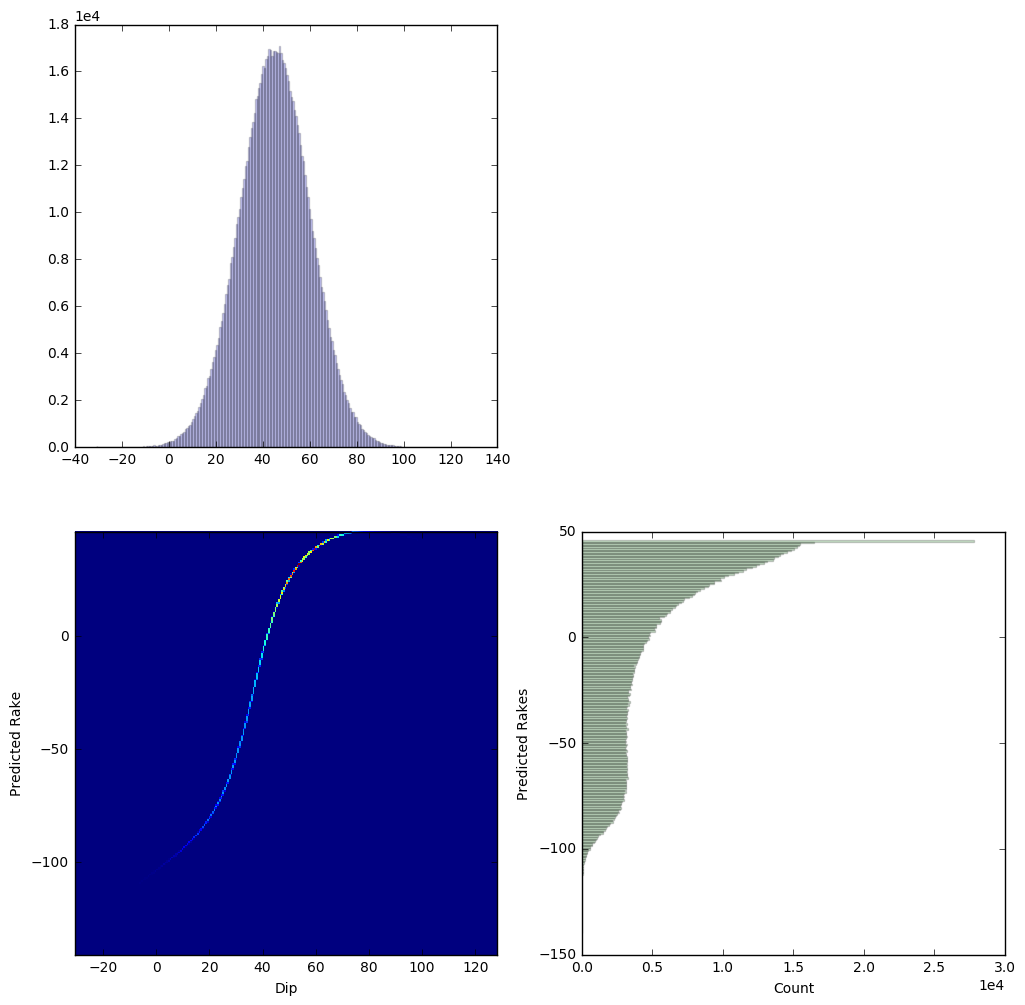

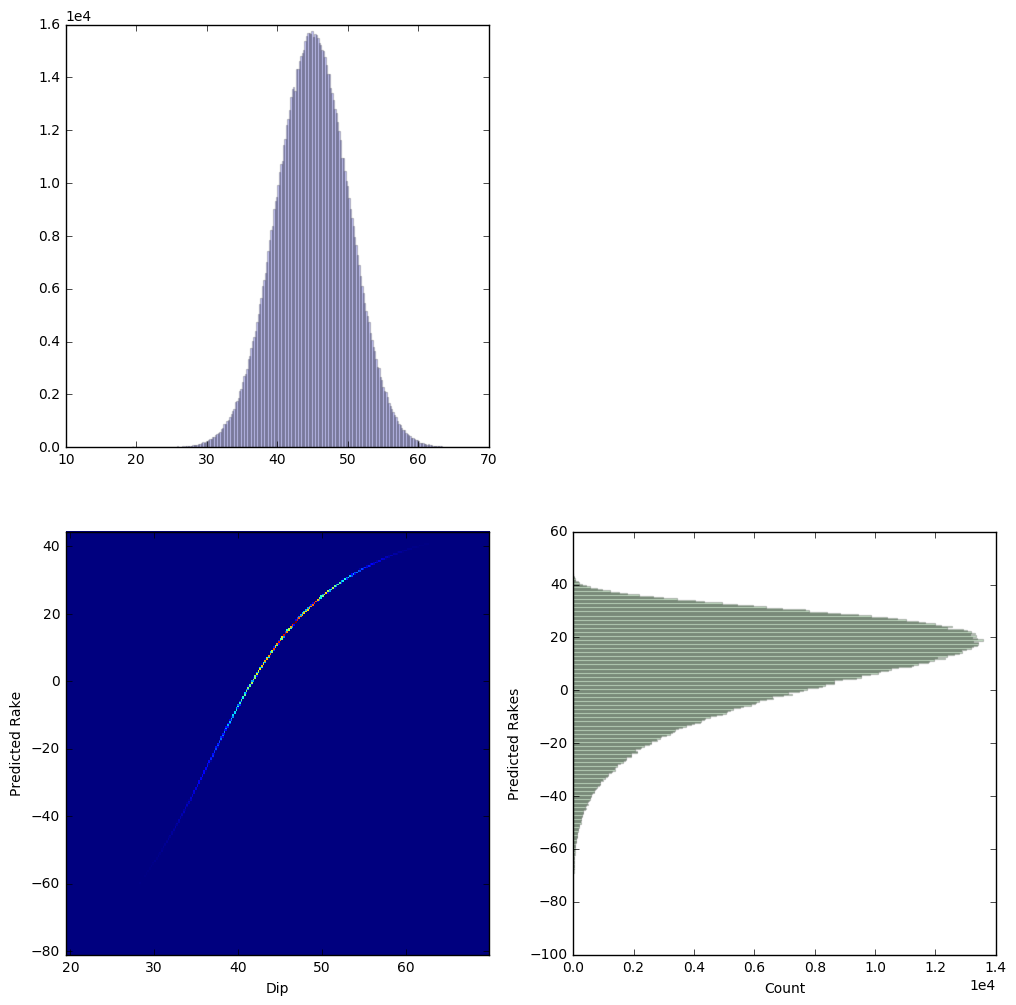

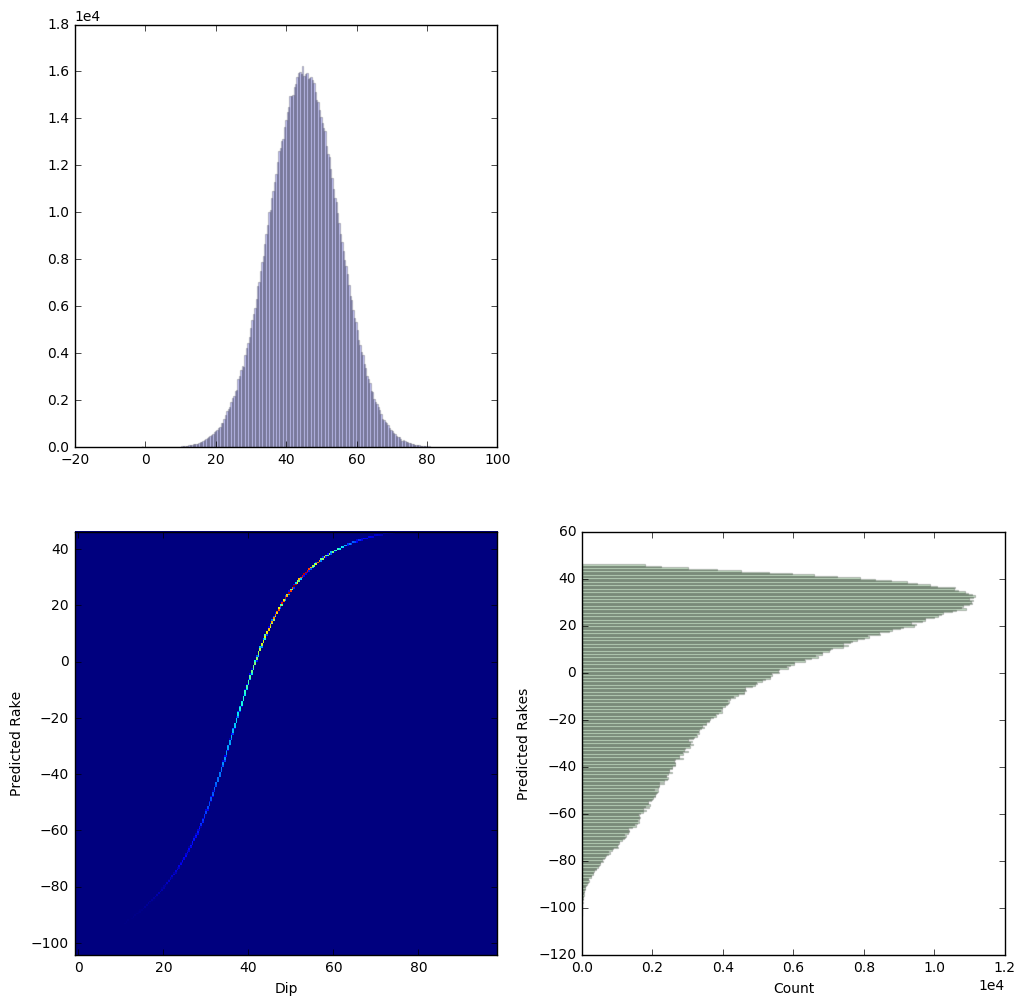

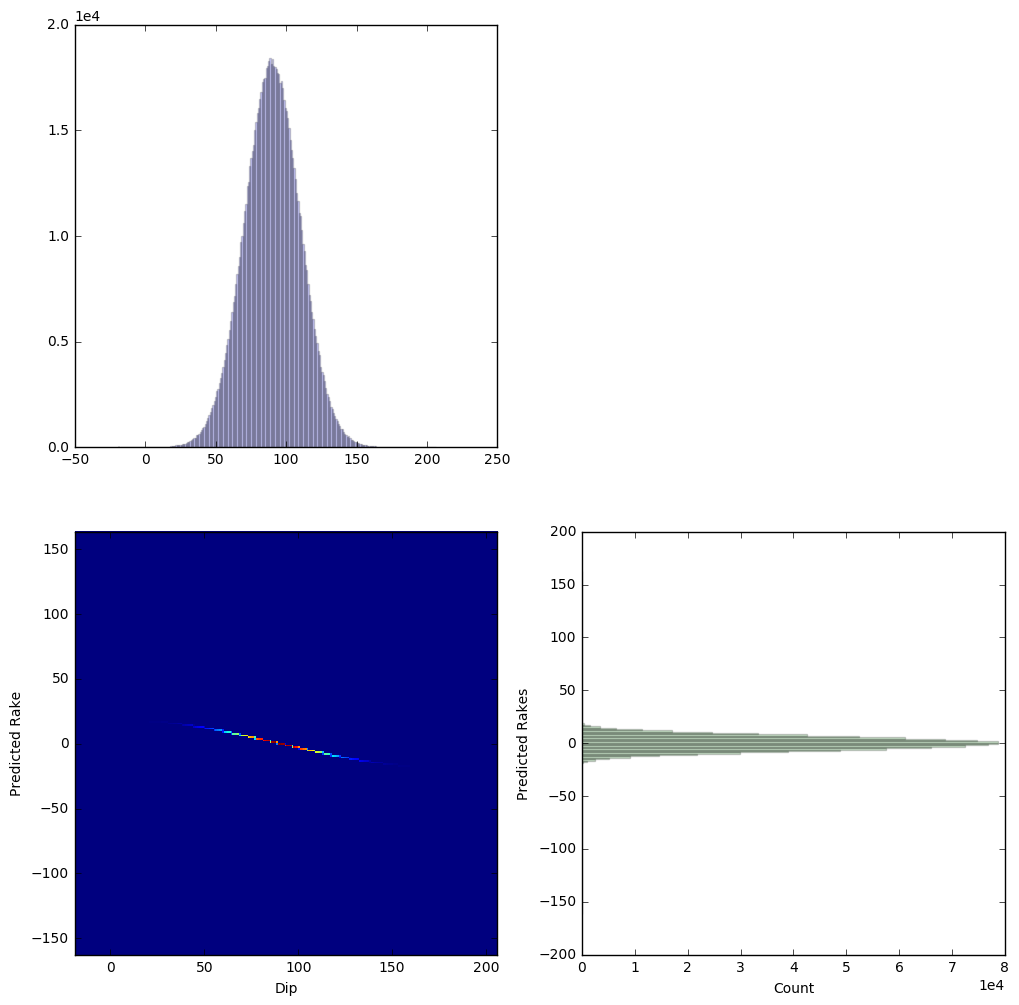

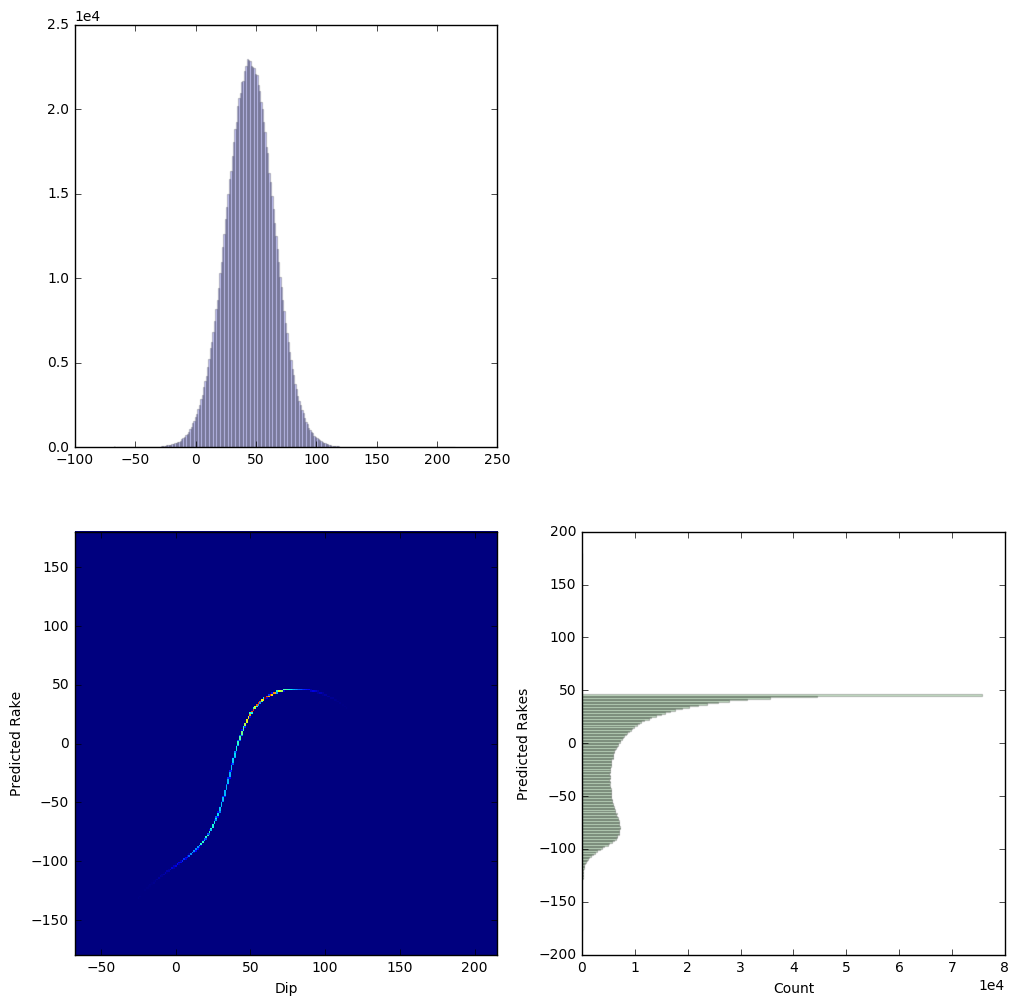

In [140]:
for i in range(len(pred_rakes)):

    fig = plt.figure(figsize=(12, 12))
    gs = gridspec.GridSpec(2, 2)



    ax1 = plt.subplot(gs[1, 0]) # row 0, col 0
    ax1.hist2d(dip_uncert[i]*180/np.pi, pred_rakes[i]*180/np.pi, bins = 250)
    ax1.set_xlabel('Dip')
    ax1.set_ylabel('Predicted Rake')



    ax2 = plt.subplot(gs[0, 0]) # row 0, col 0
    ax2.hist(dip_uncert[i]*180/np.pi, bins = 250, alpha = 0.2)
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


    ax3 = plt.subplot(gs[1, 1]) # row 0, col 0
    ax3.hist(pred_rakes[i]*180/np.pi, bins = 250, orientation='horizontal', alpha = 0.2, color = "green")
    ax3.set_xlabel('Count')
    ax3.set_ylabel('Predicted Rakes')
    ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    plt.savefig('Contour_Dip_Rake_0450{}.pdf' .format(i))
    
     




In [135]:
kappa = []
mean_pred = []
for i in range(len(pred_rakes)):

    mean_rake_pred = np.mean(pred_rakes[i])
    mean_pred.append(mean_rake_pred*180/np.pi)
    est_kappa_rake_pred = vonmises.fit(pred_rakes[i], fscale=1)
    kappa.append(est_kappa_rake_pred)


In [163]:
du1 = dip_uncert[4][np.argsort(dip_uncert[4])]
predrakes1 = pred_rakes[4][np.argsort(dip_uncert[4])]

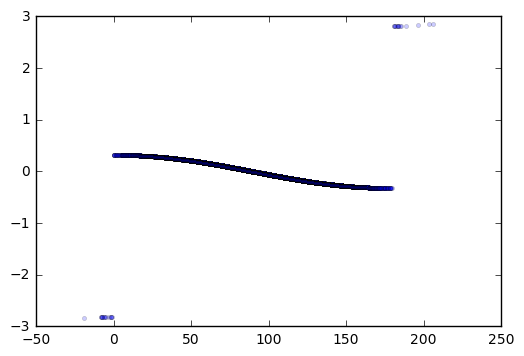

In [164]:
plt.plot(du1*180/np.pi, predrakes1, 'o', alpha = 0.2, markersize = 3)

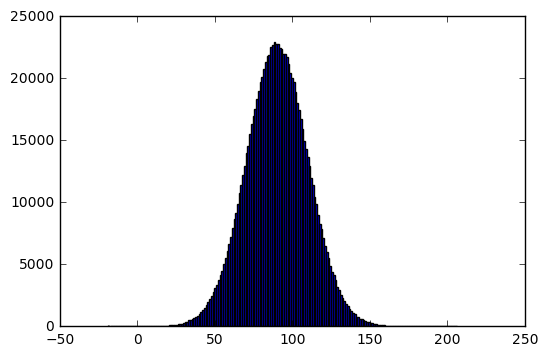

In [165]:
plt.hist(du1*180/np.pi, bins = 200)
plt.show()